# 1.4.12 Template Matching

In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [45]:
img_gray_mode = cv2.imread('hmson2.png', 0) #mario hmson2

In [46]:
img_rgb = cv2.imread('hmson2.png') #mario hmson2
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

In [47]:
cv2.imshow('img_gray_mode',img_gray_mode)
cv2.imshow('img_gray',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
# diff = img_gray_mode - img_gray
diff = cv2.bitwise_xor(img_gray, img_gray_mode)

In [49]:
print(diff)

[[ 29  29  29 ...   4   4   4]
 [ 31  31  31 ...   4   4   4]
 [  4   4   4 ...   4   4   4]
 ...
 [  3   3   3 ...   5  63   4]
 [  5   3   3 ...  27   4   4]
 [  4  27  27 ... 123 123 127]]


In [50]:
cv2.imshow('diff',diff)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
img = cv2.imread('hmson2.png',0) #mario
img2 = img.copy()
template = cv2.imread('template.png',0) #coin
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

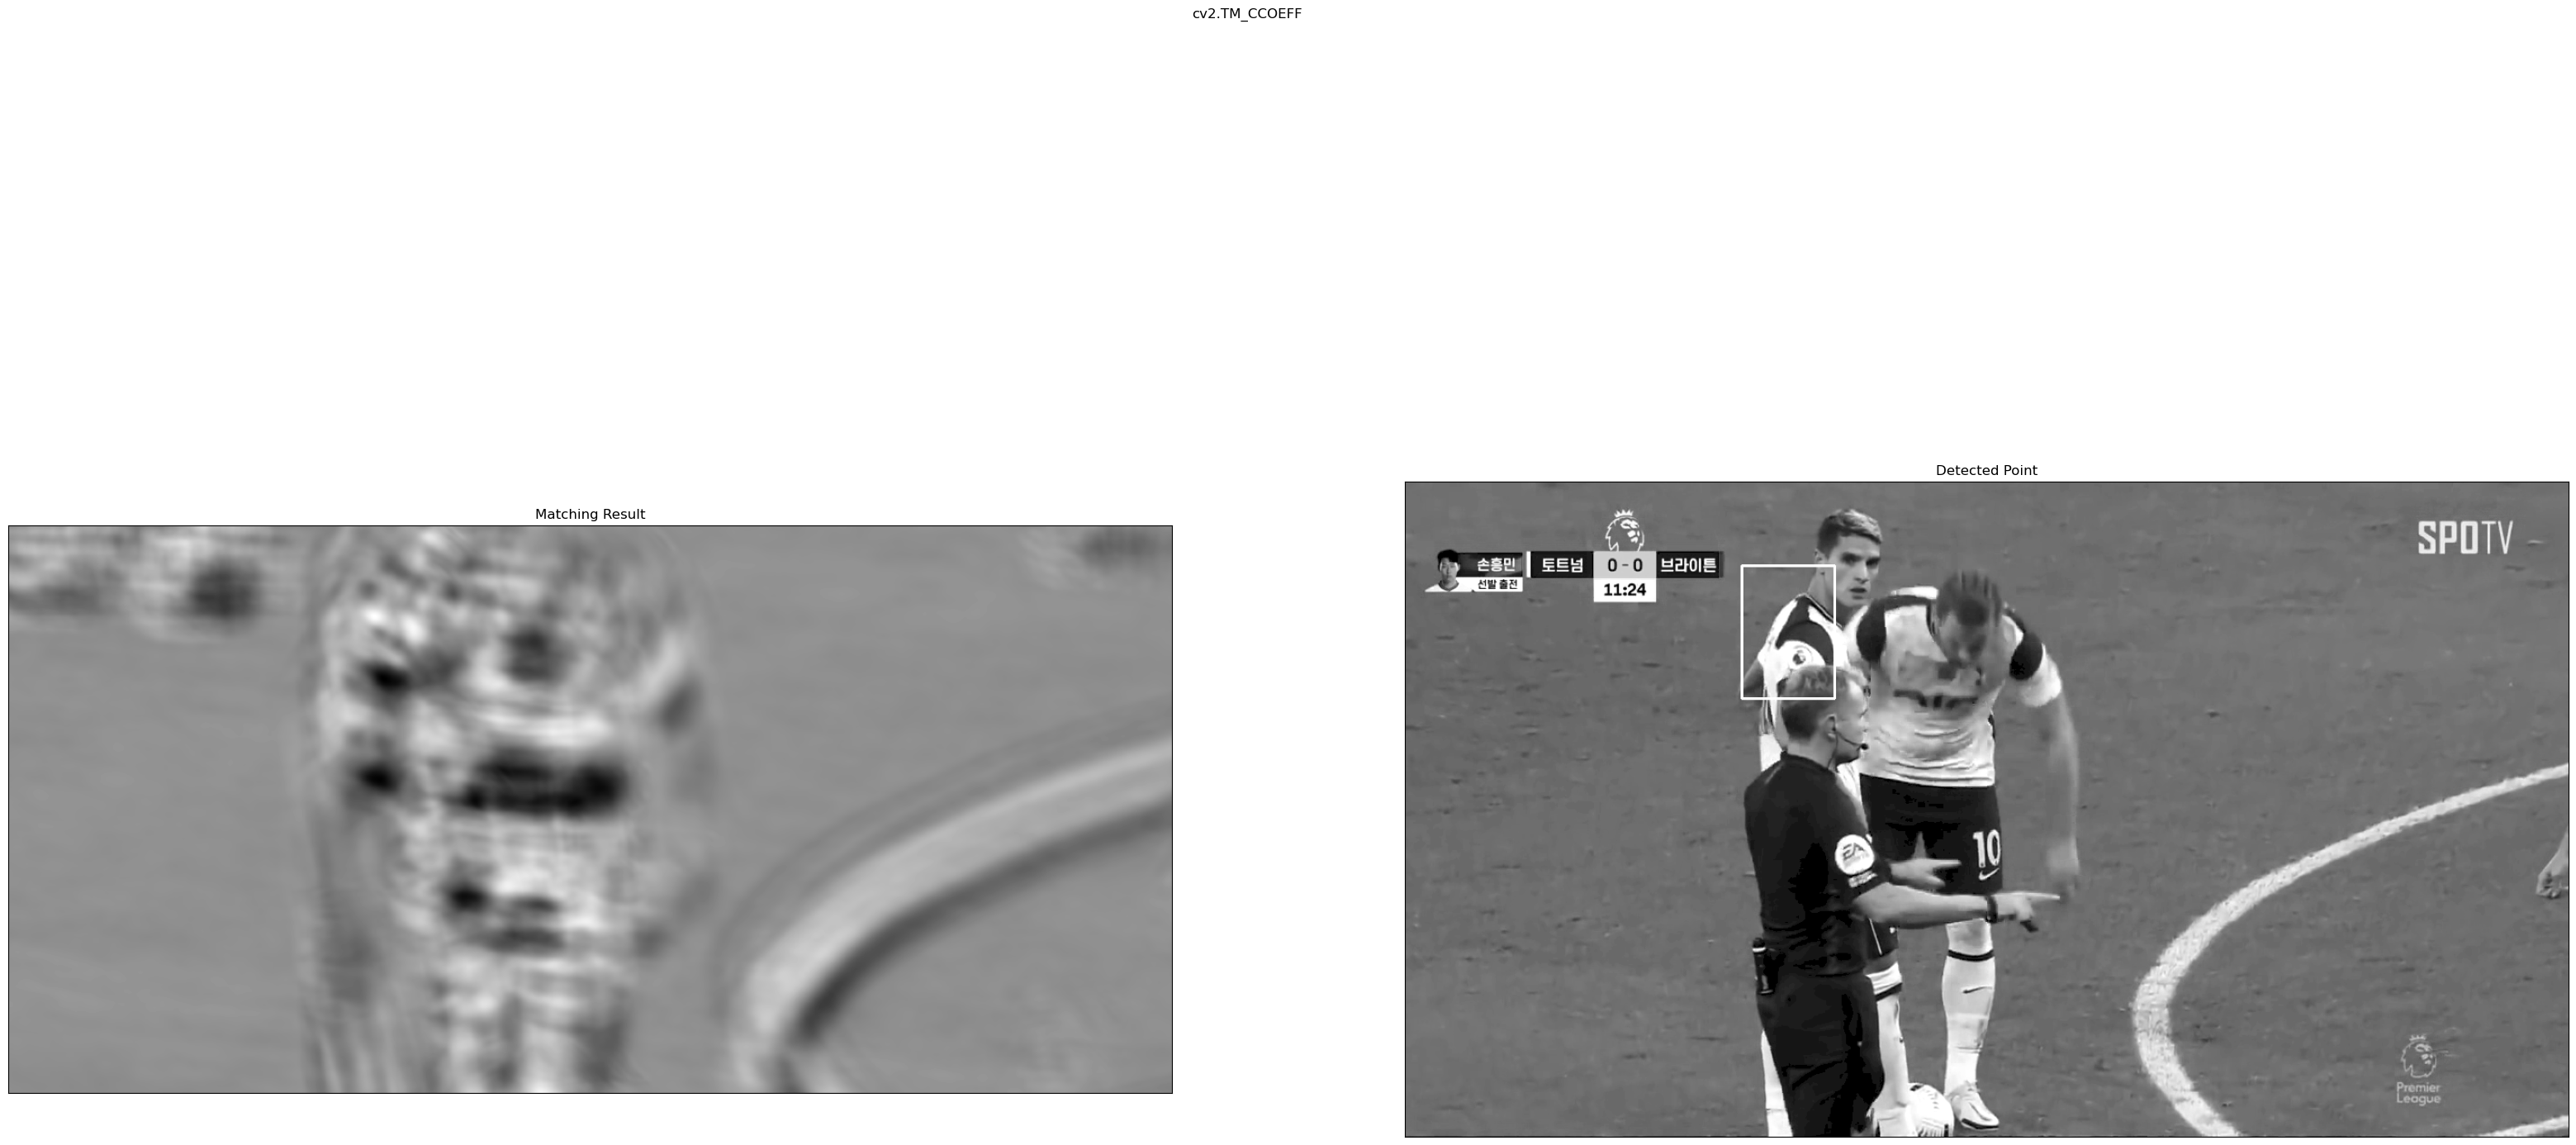

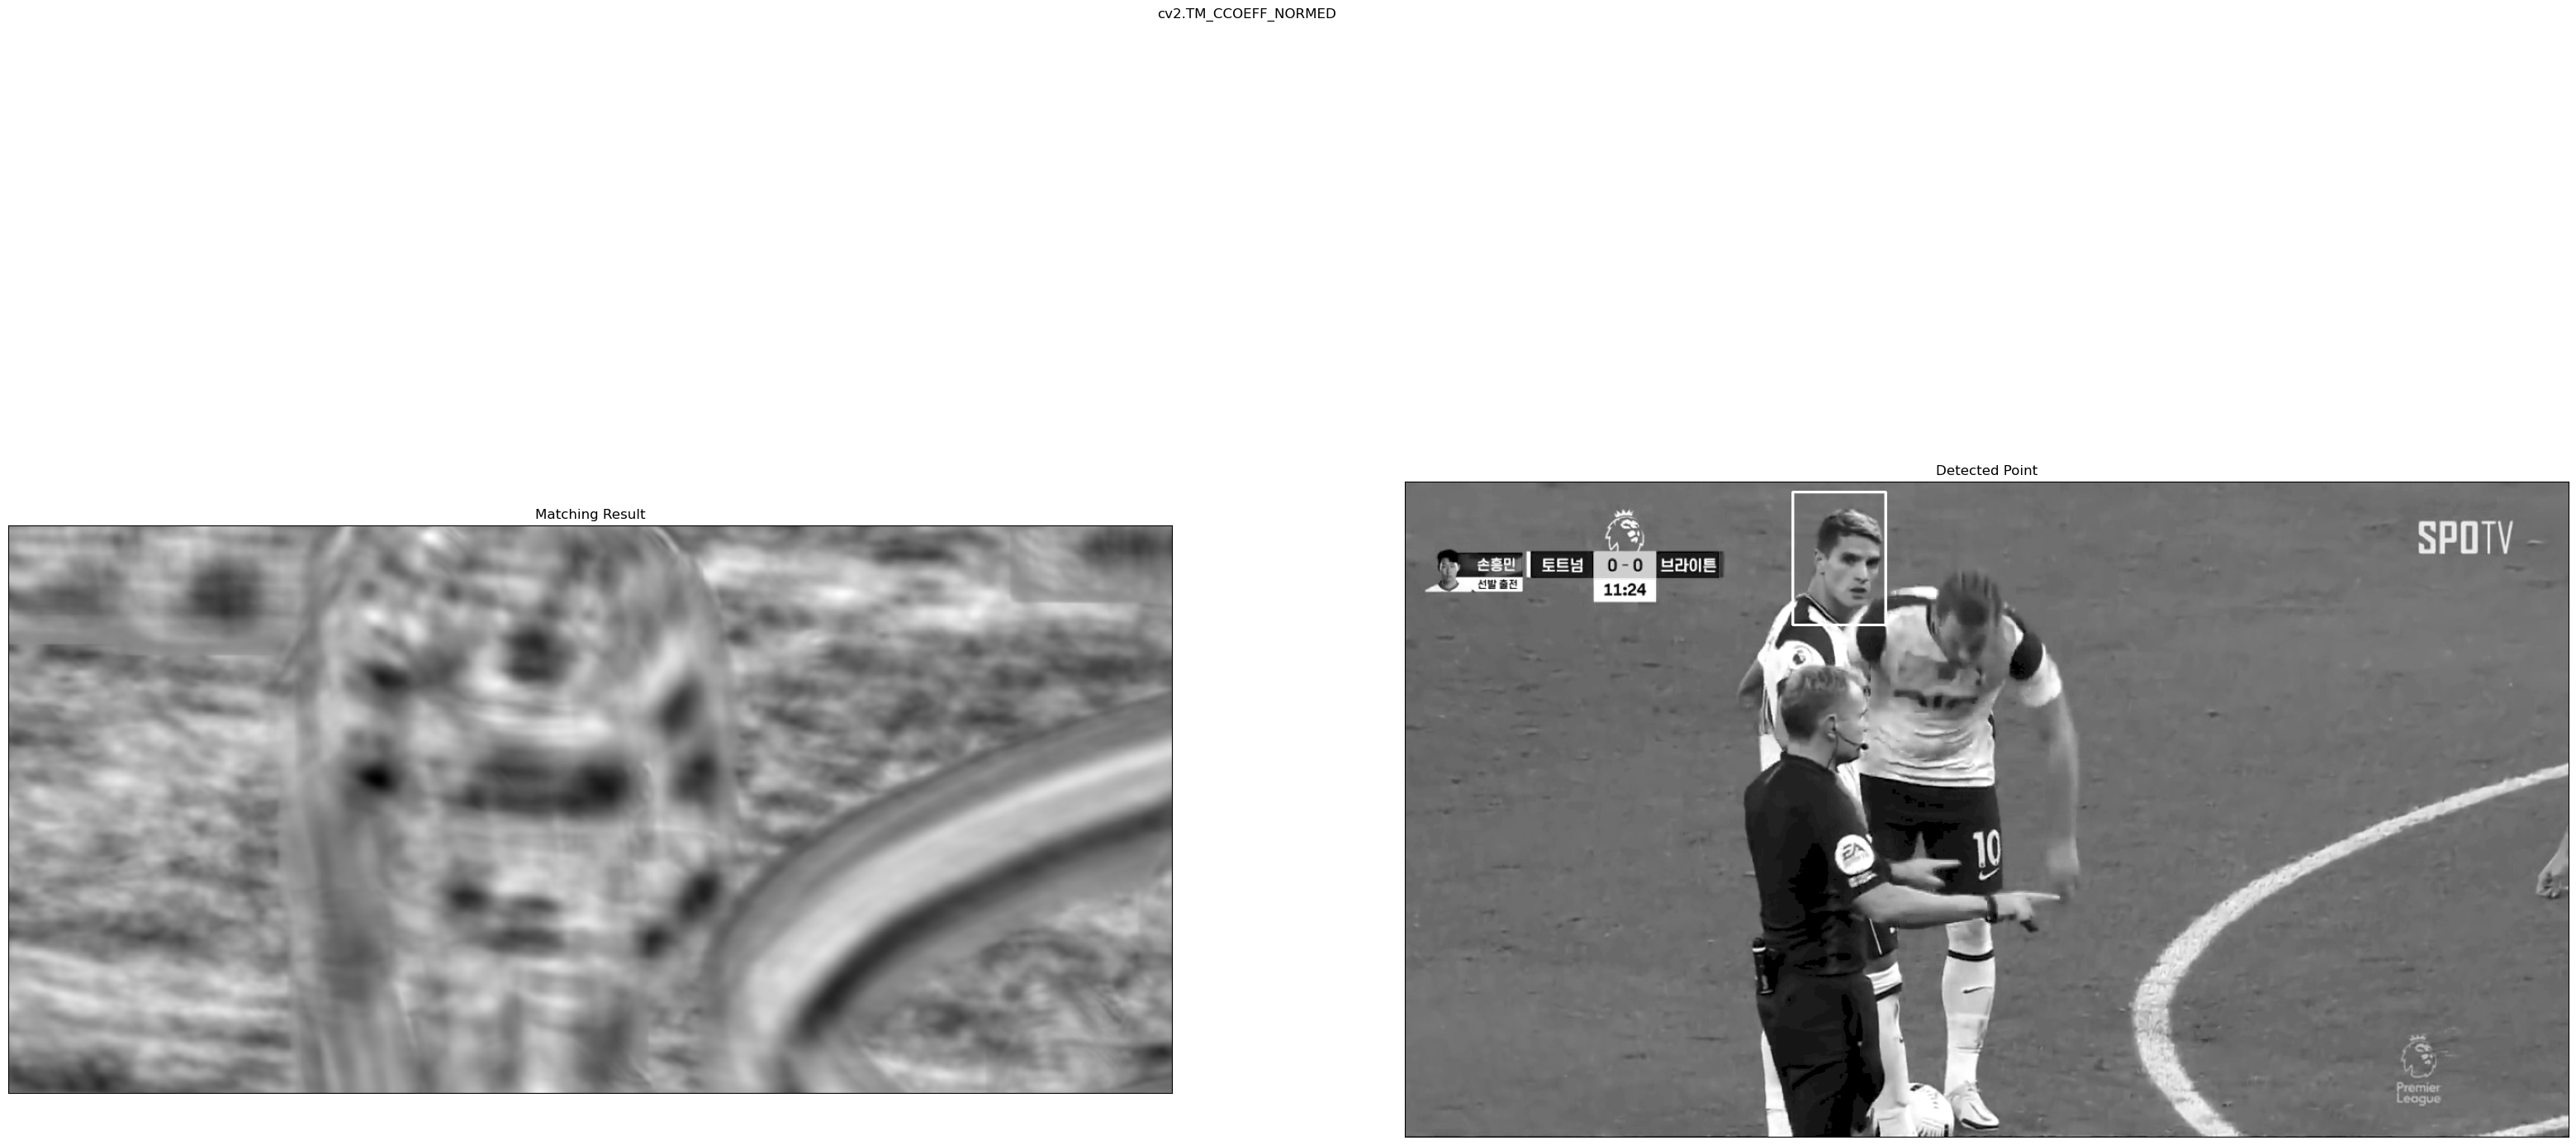

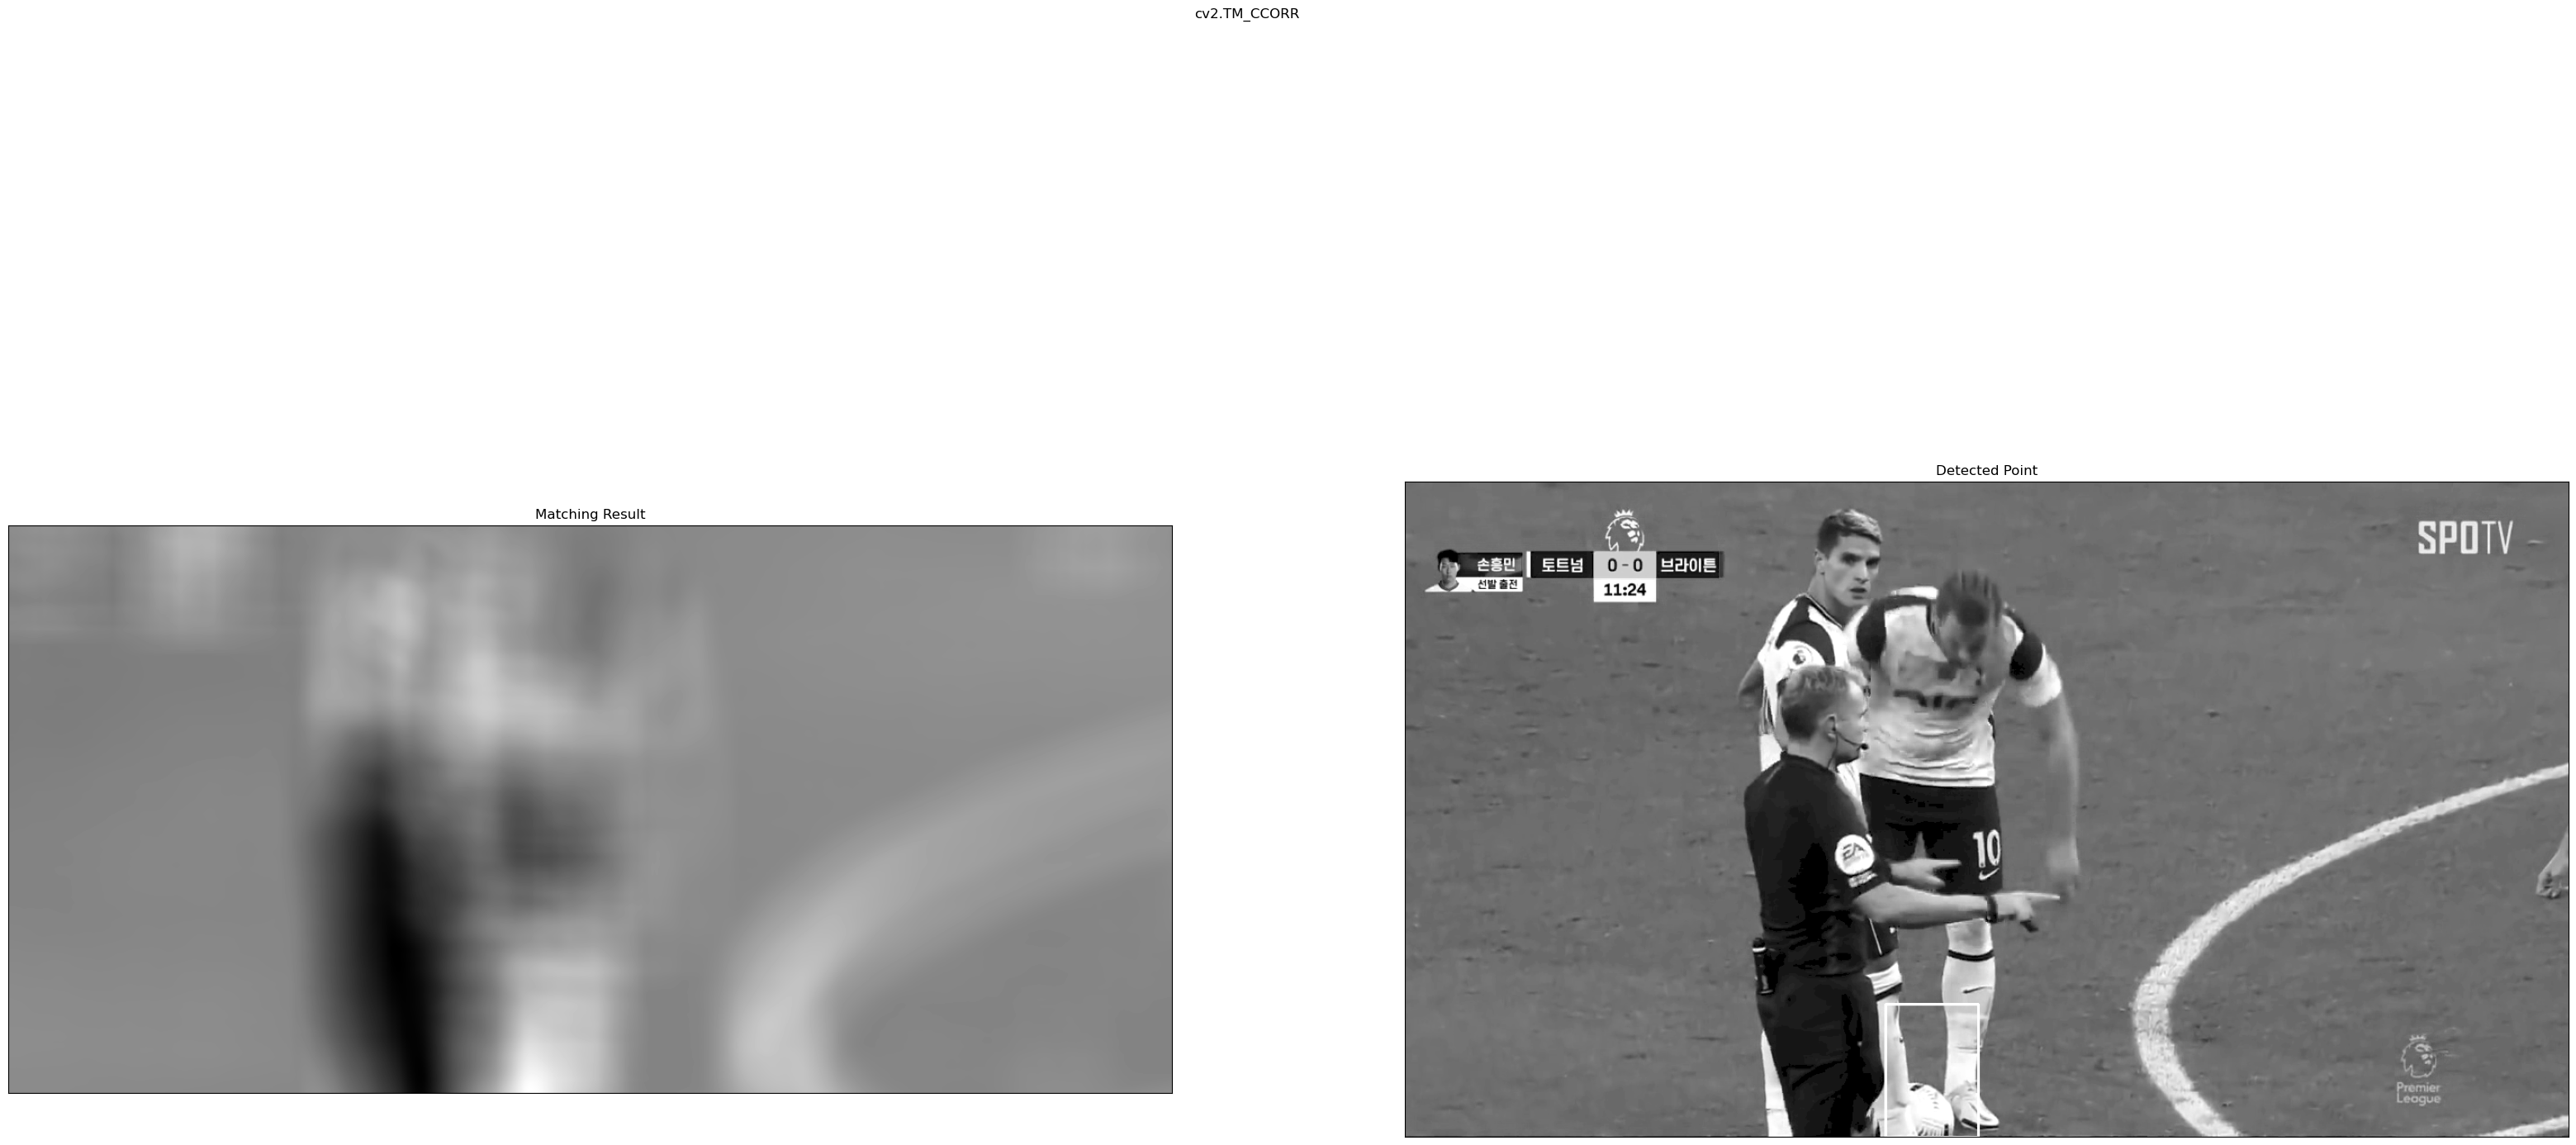

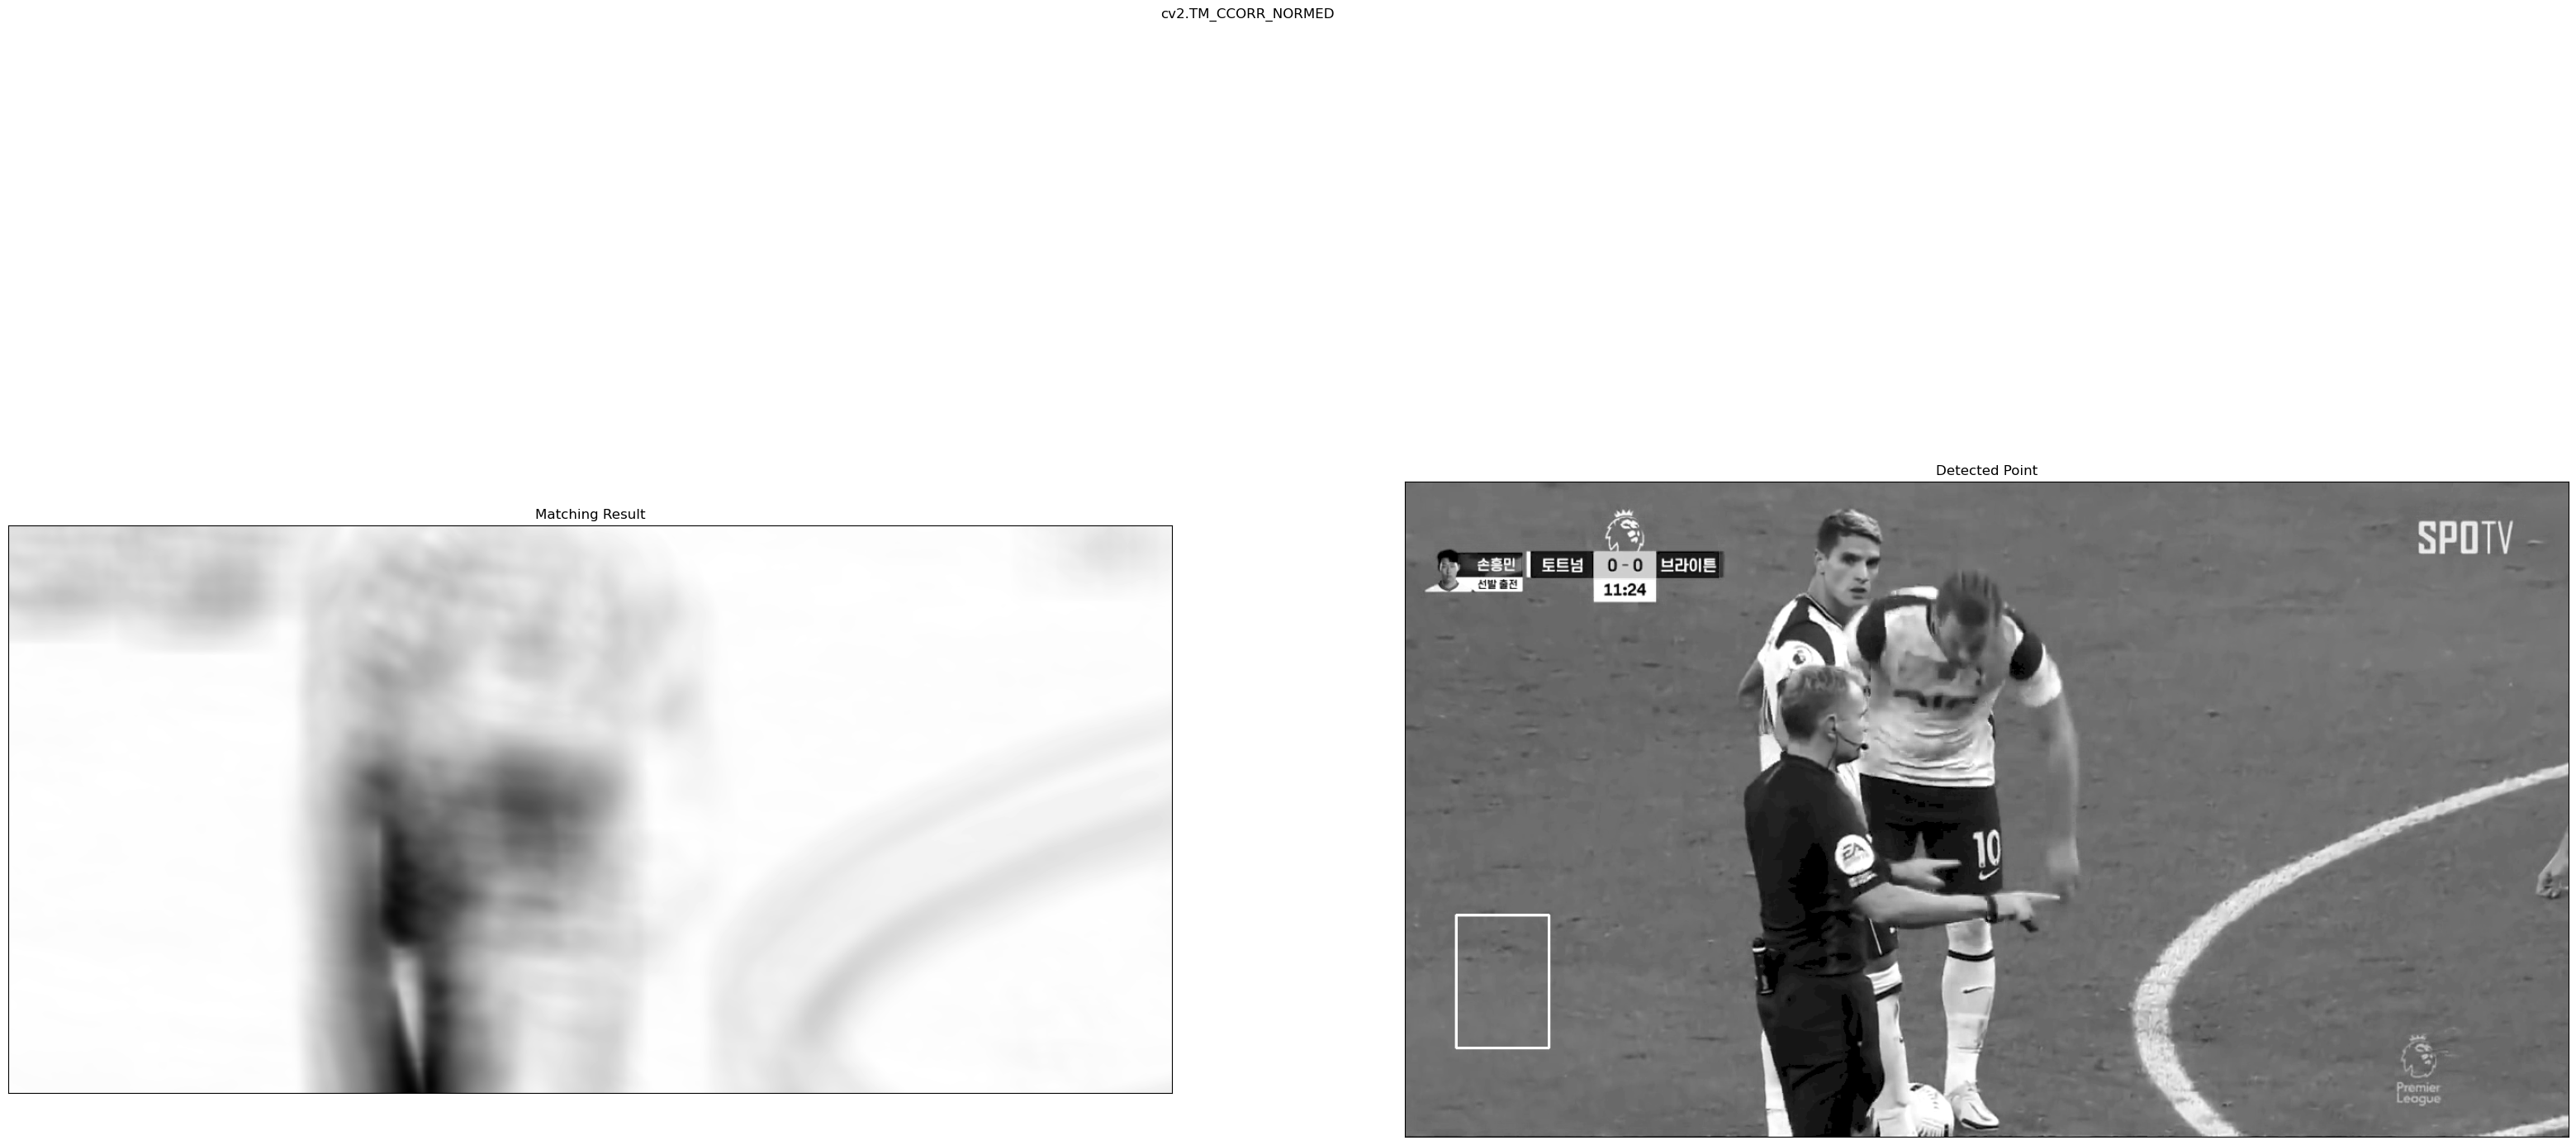

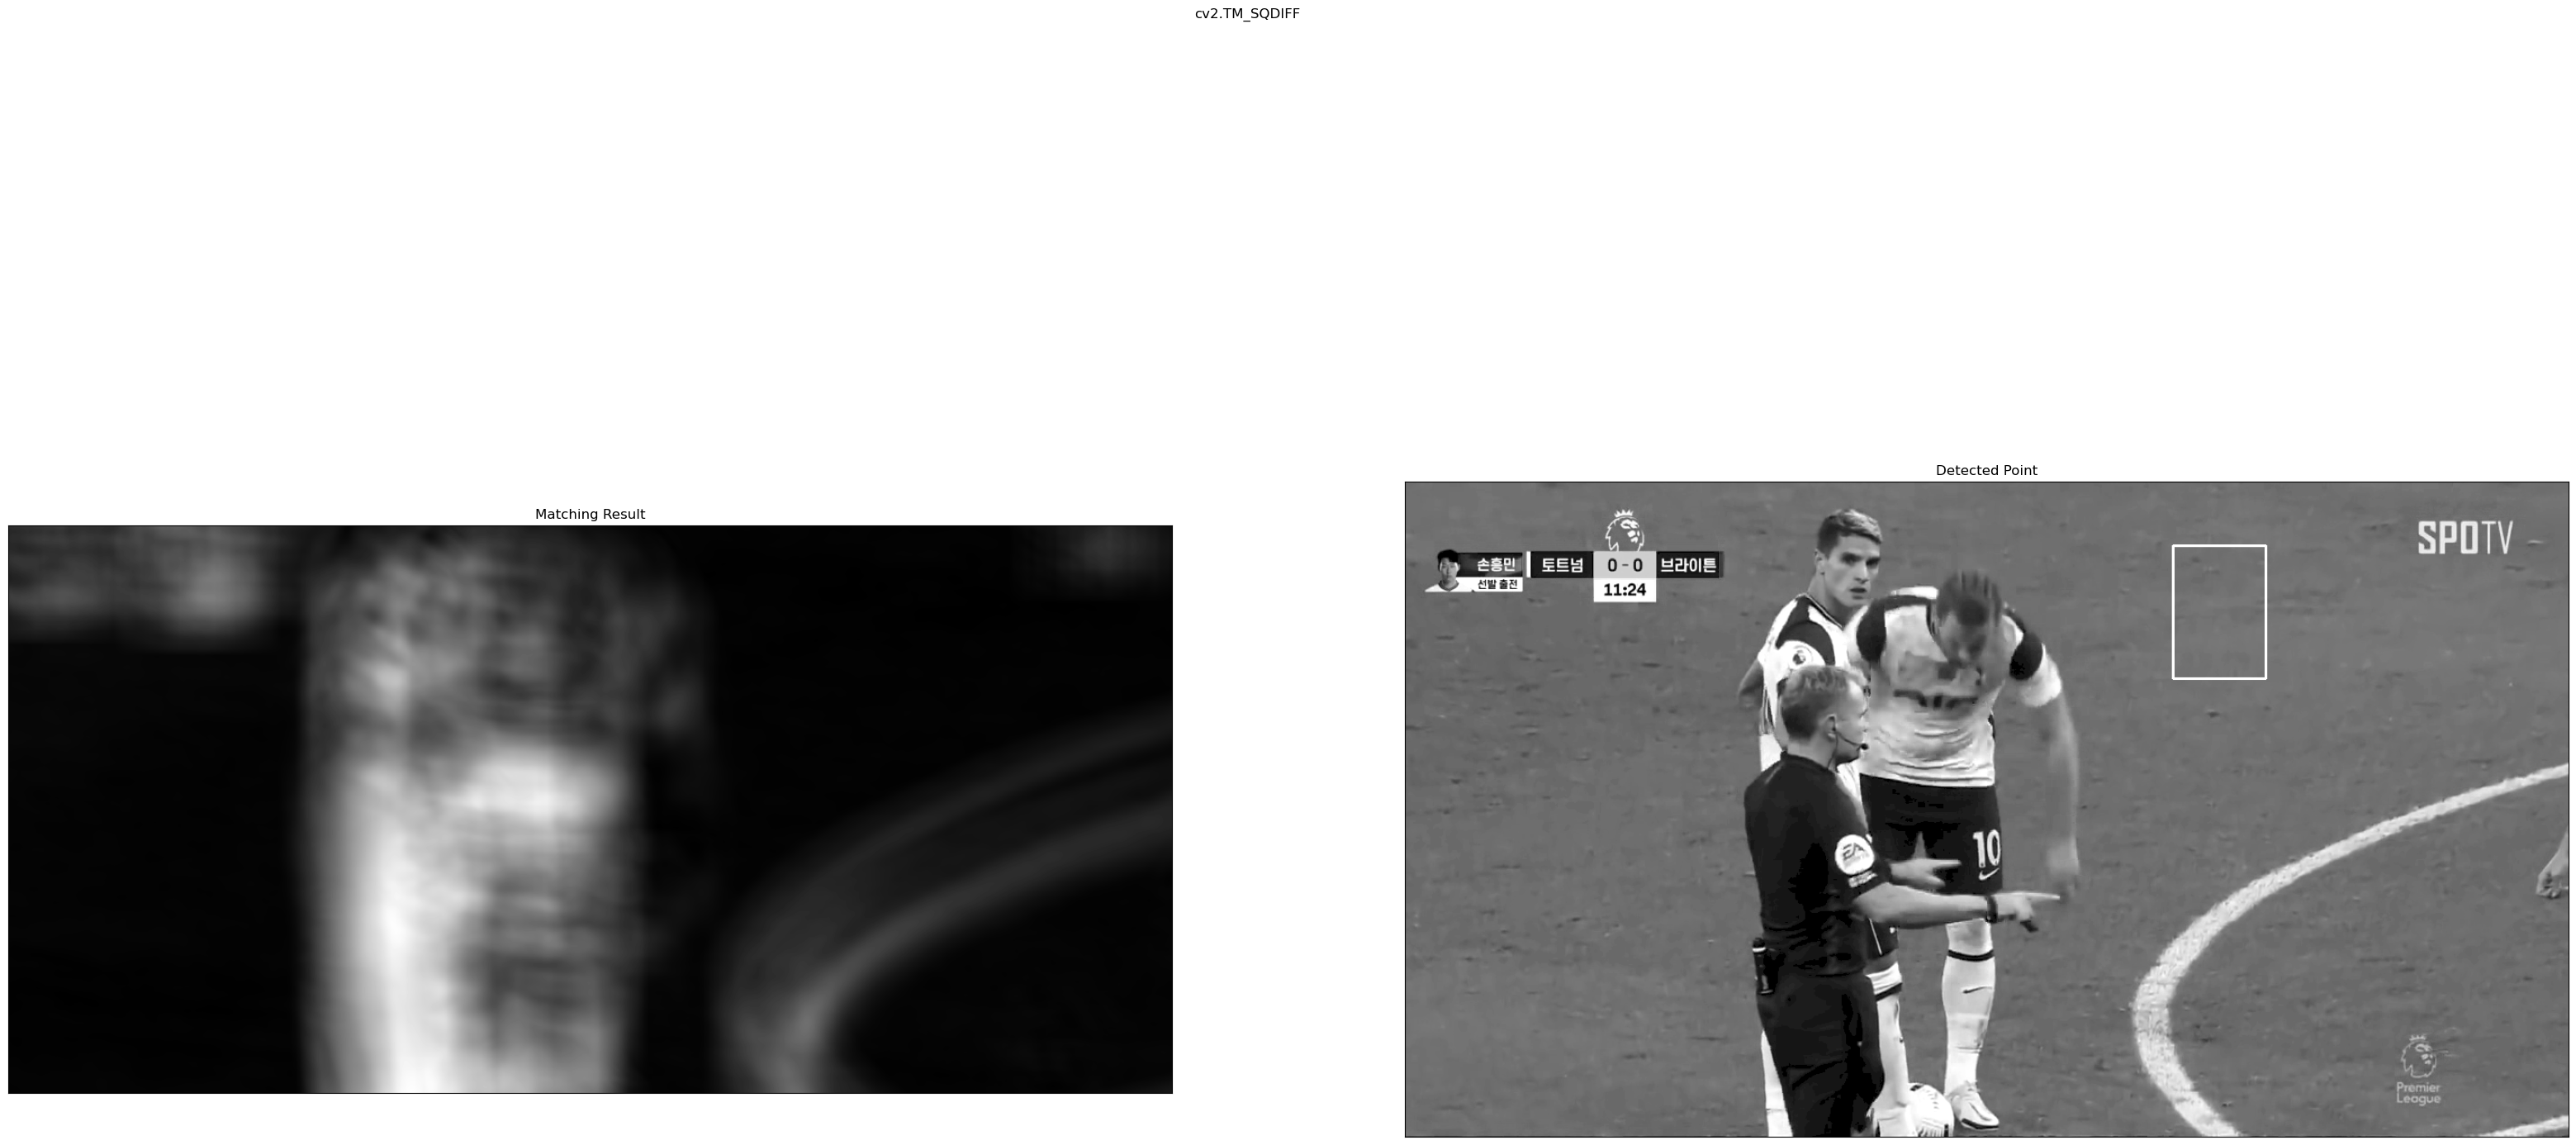

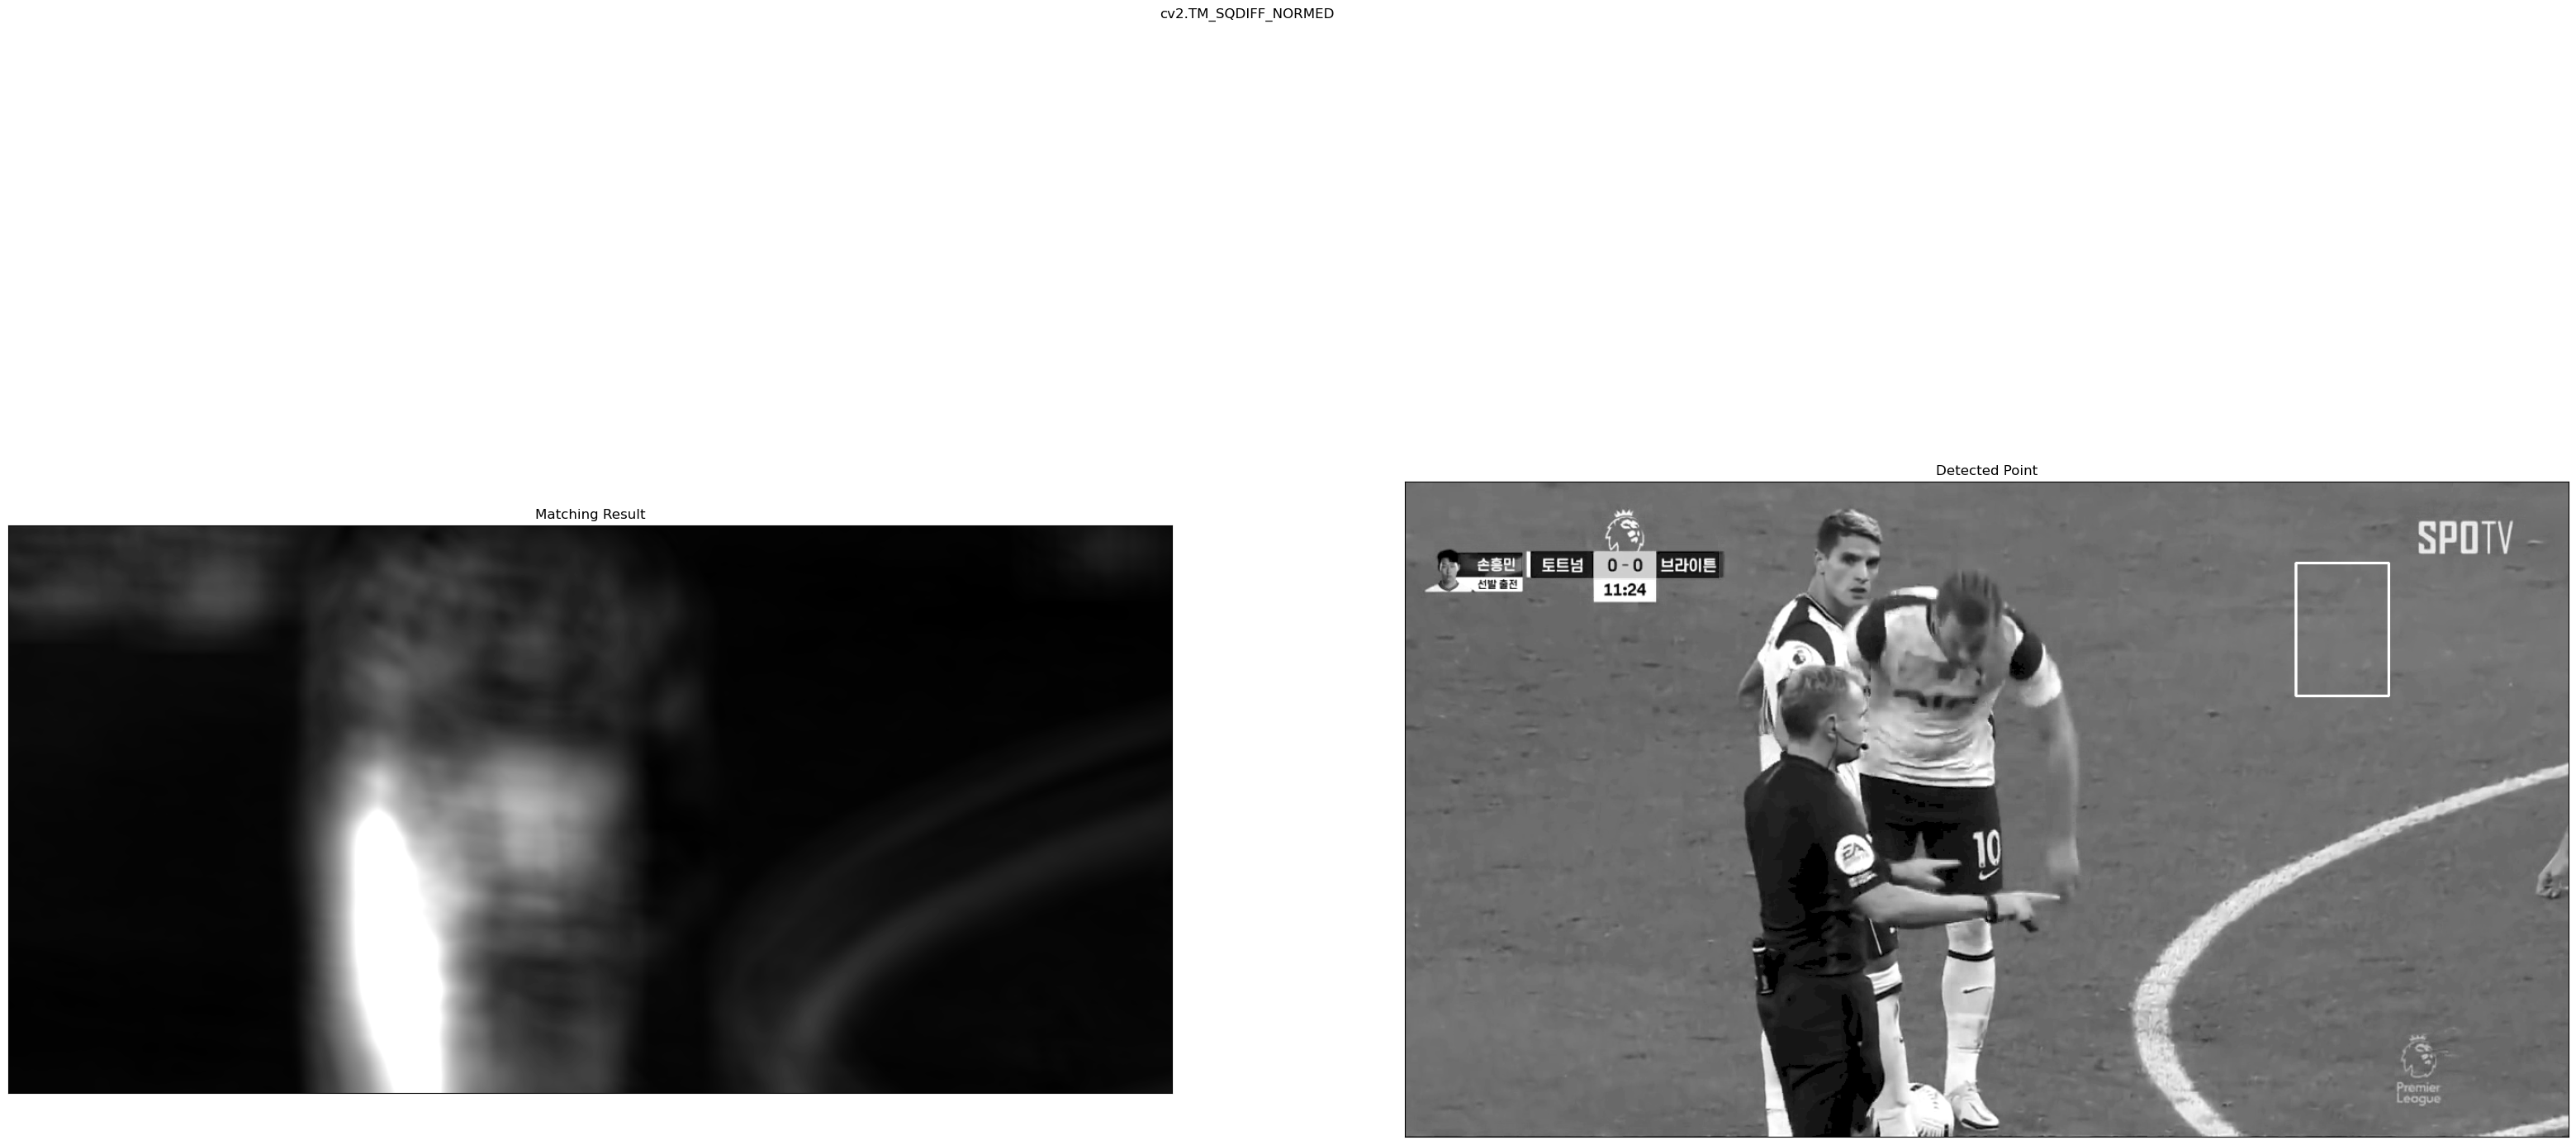

In [52]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(40,20))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [53]:
img_gray = cv2.imread('mario.png', 0) #mario hmson2
#img_rgb = cv2.imread('hmson2.png') #mario hmson2
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

In [54]:
cv2.imshow('img_gray',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
template = cv2.imread('coin.png',0) #coin template

In [56]:
cv2.imshow('coin',template)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
w, h = template.shape[::-1]
print(w,h)

71 71


In [58]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED) #cv2.TM_CCOEFF cv2.TM_CCOEFF_NORMED

In [59]:
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
print(res)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00606284  0.01041705  0.0300105  ... -0.02365342 -0.00415277
   0.01304803]
 [-0.01242618  0.00442233  0.02348129 ... -0.00662392  0.01172154
   0.02799884]
 [-0.02265804 -0.00580093  0.01217206 ... -0.0102896   0.00647064
   0.02144867]]


In [61]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

-0.4383526146411896 0.9943297505378723 (657, 478) (220, 154)


In [62]:
res=(res-min_val)/(max_val-min_val)
print(res)

[[0.30596635 0.30596635 0.30596635 ... 0.30596635 0.30596635 0.30596635]
 [0.30596635 0.30596635 0.30596635 ... 0.30596635 0.30596635 0.30596635]
 [0.30596635 0.30596635 0.30596635 ... 0.30596635 0.30596635 0.30596635]
 ...
 [0.30173454 0.31323737 0.32691342 ... 0.2894565  0.30306774 0.31507376]
 [0.297293   0.30905312 0.32235608 ... 0.3013429  0.3141479  0.3255093 ]
 [0.29015124 0.30191734 0.31446233 ... 0.2987843  0.31048283 0.32093734]]


In [63]:
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
threshold = 0.8
loc = np.where(res >= threshold)

In [65]:
print(loc[::-1])

(array([219, 220, 280, ..., 462, 522, 523], dtype=int64), array([147, 147, 147, ..., 344, 344, 344], dtype=int64))


In [66]:
img_rgb = cv2.imread('mario.png') #mario hmson2
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)

In [67]:
cv2.imshow('dst',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
cv2.imwrite('res.png',img_rgb)

True

In [69]:
def nothing(x):
    pass

In [70]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 200, 255,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    loc = np.where(res >= threshold/255.)
    img_rgb = cv2.imread('mario.png')
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2570: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [ ]:
img_gray_mode = cv2.imread('hmson2.png', 0) #mario hmson2
img_rgb = cv2.imread('hmson2.png') #mario hmson2
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# diff = img_gray_mode - img_gray
diff = cv2.bitwise_xor(img_gray, img_gray_mode)

In [ ]:
print(diff)

[[ 28  28  28 ...   4   4   4]
 [ 28  28  28 ...   4   4   4]
 [ 28  28  28 ...   4   7   7]
 ...
 [  5   5   5 ...  29  29  29]
 [  7   7   7 ...  12  12  12]
 [123 122 122 ...   5   5   5]]


In [ ]:
cv2.imshow('dst',diff)
cv2.waitKey(0)
cv2.destroyAllWindows()

https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python